In [ ]:
import os
import random
import shutil

In [ ]:
"""
def split_dataset_multiclass(source_dir, label_dir, person_train_dir, person_val_dir, ppe_train_dir, ppe_val_dir, split_ratio=0.8):
    # Create directories
    for dir in [person_train_dir, person_val_dir, ppe_train_dir, ppe_val_dir]:
        os.makedirs(os.path.join(dir, 'images'), exist_ok=True)
        os.makedirs(os.path.join(dir, 'labels'), exist_ok=True)

    # Get all image files
    image_files = [f for f in os.listdir(os.path.join(source_dir, 'images')) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Shuffle the list of image files
    random.shuffle(image_files)

    # Calculate the split index
    split_index = int(len(image_files) * split_ratio)

    # Split the dataset
    train_images = image_files[:split_index]
    val_images = image_files[split_index:]

    def process_label_file(src_path, person_dest_path, ppe_dest_path):
        with open(src_path, 'r') as f:
            lines = f.readlines()

        person_lines = []
        ppe_lines = []

        for line in lines:
            class_id = int(line.split()[0])
            if class_id == 0:  # Assuming 0 is the class ID for person
                person_lines.append(line)
            else:
                # Adjust class ID for PPE model (shift IDs down by 1)
                new_line = f"{class_id - 1} {' '.join(line.split()[1:])}\n"
                ppe_lines.append(new_line)

        if person_lines:
            with open(person_dest_path, 'w') as f:
                f.writelines(person_lines)

        if ppe_lines:
            with open(ppe_dest_path, 'w') as f:
                f.writelines(ppe_lines)

    # Process files
    for img in train_images:
        img_path = os.path.join(source_dir, 'images', img)
        label_file = os.path.splitext(img)[0] + '.txt'
        label_path = os.path.join(label_dir, label_file)

        if os.path.exists(label_path):
            shutil.copy(img_path, os.path.join(person_train_dir, 'images', img))
            shutil.copy(img_path, os.path.join(ppe_train_dir, 'images', img))
            process_label_file(label_path,
                               os.path.join(person_train_dir, 'labels', label_file),
                               os.path.join(ppe_train_dir, 'labels', label_file))

    for img in val_images:
        img_path = os.path.join(source_dir, 'images', img)
        label_file = os.path.splitext(img)[0] + '.txt'
        label_path = os.path.join(label_dir, label_file)

        if os.path.exists(label_path):
            shutil.copy(img_path, os.path.join(person_val_dir, 'images', img))
            shutil.copy(img_path, os.path.join(ppe_val_dir, 'images', img))
            process_label_file(label_path,
                               os.path.join(person_val_dir, 'labels', label_file),
                               os.path.join(ppe_val_dir, 'labels', label_file))

    print(f"Dataset split complete. {len(train_images)} training samples, {len(val_images)} validation samples.")

# Usage
source_dir = '/content/drive/MyDrive/Syook Dataset/datasets'
label_dir = '/content/drive/MyDrive/Syook Dataset/datasets/yolov8_annotations'
person_train_dir = '/content/drive/MyDrive/Syook Dataset/datasets/person/train'
person_val_dir = '/content/drive/MyDrive/Syook Dataset/datasets/person/val'
ppe_train_dir = '/content/drive/MyDrive/Syook Dataset/datasets/ppe/train'
ppe_val_dir = '/content/drive/MyDrive/Syook Dataset/datasets/ppe/val'

split_dataset_multiclass(source_dir, label_dir, person_train_dir, person_val_dir, ppe_train_dir, ppe_val_dir, split_ratio=0.8)
"""

'\ndef split_dataset_multiclass(source_dir, label_dir, person_train_dir, person_val_dir, ppe_train_dir, ppe_val_dir, split_ratio=0.8):\n    # Create directories\n    for dir in [person_train_dir, person_val_dir, ppe_train_dir, ppe_val_dir]:\n        os.makedirs(os.path.join(dir, \'images\'), exist_ok=True)\n        os.makedirs(os.path.join(dir, \'labels\'), exist_ok=True)\n\n    # Get all image files\n    image_files = [f for f in os.listdir(os.path.join(source_dir, \'images\')) if f.endswith((\'.jpg\', \'.jpeg\', \'.png\'))]\n    \n    # Shuffle the list of image files\n    random.shuffle(image_files)\n    \n    # Calculate the split index\n    split_index = int(len(image_files) * split_ratio)\n    \n    # Split the dataset\n    train_images = image_files[:split_index]\n    val_images = image_files[split_index:]\n    \n    def process_label_file(src_path, person_dest_path, ppe_dest_path):\n        with open(src_path, \'r\') as f:\n            lines = f.readlines()\n        \n        p

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

In [ ]:

model = YOLO('yolov8n.pt')

In [ ]:
# Define your dataset configuration
data_yaml = '/content/drive/MyDrive/Syook Dataset/dataset.yaml'

# Train the model
results = model.train(
    data=data_yaml,
    epochs=50,  # Adjust based on your dataset size and model performance
    imgsz=640,
    batch=16,   # Adjust based on your GPU memory
    patience=10,  # Early stopping patience
    pretrained=True,
    optimizer='Adam',  # You can also try 'SGD'
    lr0=0.001,  # Initial learning rate
    lrf=0.01,   # Final learning rate fraction
    augment=True,
    # Data augmentation parameters
    hsv_h=0.015,  # HSV-Hue augmentation
    hsv_s=0.7,    # HSV-Saturation augmentation
    hsv_v=0.4,    # HSV-Value augmentation
    degrees=10.0, # Rotation augmentation
    translate=0.2,# Translation augmentation
    scale=0.5,    # Scale augmentation
    shear=2.0,    # Shear augmentation
    flipud=0.5,   # Vertical flip augmentation probability
    fliplr=0.5,   # Horizontal flip augmentation probability
    mosaic=1.0,   # Mosaic augmentation probability
    mixup=0.5,    # Mixup augmentation probability
)

# Validate the model
val_results = model.val()

# Print validation results
print("Validation Results:")
print(f"mAP50-95: {val_results.box.map}")
print(f"mAP50: {val_results.box.map50}")
print(f"mAP75: {val_results.box.map75}")


model.save('final_model.pt')

print("Model saved successfully.")



Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Syook Dataset/dataset.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

train: Scanning /content/drive/MyDrive/Syook Dataset/datasets/person/train/labels.cache... 327 images, 5 backgrounds, 0 corrupt: 100%|██████████| 332/332 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Syook Dataset/datasets/person/val/labels.cache... 82 images, 2 backgrounds, 0 corrupt: 100%|██████████| 84/84 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.727       2.14      1.696        102        640: 100%|██████████| 21/21 [05:38<00:00, 16.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.27s/it]

                   all         84        295    0.00972      0.831     0.0761     0.0239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.662      1.807      1.653         89        640: 100%|██████████| 21/21 [05:17<00:00, 15.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.86s/it]

                   all         84        295       0.73      0.427      0.543       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.602      1.682      1.649        101        640: 100%|██████████| 21/21 [05:08<00:00, 14.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.80s/it]

                   all         84        295      0.657      0.573       0.62      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.615      1.642      1.673        133        640: 100%|██████████| 21/21 [05:00<00:00, 14.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.58s/it]

                   all         84        295      0.659      0.603      0.645      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.623        1.7      1.693         94        640: 100%|██████████| 21/21 [04:44<00:00, 13.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.27s/it]

                   all         84        295       0.83      0.634      0.779      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.575      1.633      1.643        128        640: 100%|██████████| 21/21 [04:42<00:00, 13.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.42s/it]

                   all         84        295      0.771      0.698      0.784      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.598      1.631      1.679        117        640: 100%|██████████| 21/21 [04:42<00:00, 13.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.07s/it]

                   all         84        295      0.705      0.719      0.731       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.577      1.632      1.659         90        640: 100%|██████████| 21/21 [04:38<00:00, 13.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.75s/it]

                   all         84        295       0.73      0.759      0.737      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.562      1.571      1.639        110        640: 100%|██████████| 21/21 [04:41<00:00, 13.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.85s/it]

                   all         84        295      0.736       0.81      0.785      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.533      1.596      1.644        106        640: 100%|██████████| 21/21 [04:37<00:00, 13.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.69s/it]

                   all         84        295       0.74      0.668      0.726      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G       1.53      1.558       1.63         86        640: 100%|██████████| 21/21 [04:40<00:00, 13.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.47s/it]

                   all         84        295      0.724      0.678      0.706      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.513       1.51        1.6         91        640: 100%|██████████| 21/21 [04:45<00:00, 13.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.75s/it]

                   all         84        295      0.777      0.732      0.789      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.513      1.501      1.589         93        640: 100%|██████████| 21/21 [04:39<00:00, 13.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.32s/it]

                   all         84        295      0.749      0.688      0.747      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.524      1.538      1.618        116        640: 100%|██████████| 21/21 [04:41<00:00, 13.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.01s/it]

                   all         84        295      0.788      0.695      0.769      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.504        1.5      1.608        151        640: 100%|██████████| 21/21 [04:37<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.79s/it]

                   all         84        295      0.724      0.702      0.724      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.478      1.476      1.585        105        640: 100%|██████████| 21/21 [04:37<00:00, 13.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.38s/it]

                   all         84        295      0.779      0.736      0.797      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G       1.47      1.455      1.585         99        640: 100%|██████████| 21/21 [04:39<00:00, 13.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.63s/it]

                   all         84        295      0.754      0.776        0.8      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.469      1.441      1.581         90        640: 100%|██████████| 21/21 [04:36<00:00, 13.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.72s/it]

                   all         84        295      0.821      0.776      0.826      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.502      1.464      1.589        106        640: 100%|██████████| 21/21 [04:38<00:00, 13.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.79s/it]

                   all         84        295      0.797      0.786      0.827       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.455      1.414      1.572         82        640: 100%|██████████| 21/21 [04:40<00:00, 13.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.21s/it]

                   all         84        295       0.81       0.79      0.853      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.445      1.407      1.569        122        640: 100%|██████████| 21/21 [04:37<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.60s/it]

                   all         84        295      0.844      0.826      0.854      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.454      1.391      1.547         81        640: 100%|██████████| 21/21 [04:34<00:00, 13.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.20s/it]

                   all         84        295      0.804      0.715      0.794      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.455      1.394      1.539         85        640: 100%|██████████| 21/21 [04:34<00:00, 13.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.76s/it]

                   all         84        295      0.815      0.776      0.834      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.427      1.395      1.534         92        640: 100%|██████████| 21/21 [04:33<00:00, 13.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.84s/it]

                   all         84        295       0.81      0.776      0.834      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.419      1.375      1.535        112        640: 100%|██████████| 21/21 [04:36<00:00, 13.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.39s/it]

                   all         84        295      0.815       0.81       0.85      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.407      1.328       1.52         97        640: 100%|██████████| 21/21 [04:37<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.41s/it]

                   all         84        295      0.816       0.82      0.859      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.363      1.265      1.469         76        640: 100%|██████████| 21/21 [04:39<00:00, 13.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.56s/it]

                   all         84        295      0.827      0.824       0.86      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.416      1.331      1.518        104        640: 100%|██████████| 21/21 [04:38<00:00, 13.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.88s/it]

                   all         84        295      0.818      0.827      0.862      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.388      1.314      1.503        120        640: 100%|██████████| 21/21 [04:39<00:00, 13.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.63s/it]

                   all         84        295      0.814      0.831      0.876      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.396      1.307      1.517         89        640: 100%|██████████| 21/21 [04:42<00:00, 13.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.36s/it]

                   all         84        295      0.879      0.861      0.886      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G       1.35      1.265      1.485        119        640: 100%|██████████| 21/21 [04:40<00:00, 13.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.87s/it]

                   all         84        295      0.848      0.831       0.88        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G       1.39      1.261      1.501        131        640: 100%|██████████| 21/21 [04:39<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.81s/it]

                   all         84        295      0.848      0.831      0.875      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.373      1.275      1.491        102        640: 100%|██████████| 21/21 [04:37<00:00, 13.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.89s/it]

                   all         84        295      0.855      0.841      0.891      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.381      1.289      1.515        109        640: 100%|██████████| 21/21 [04:40<00:00, 13.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.44s/it]

                   all         84        295      0.848      0.851      0.903      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G       1.34      1.266      1.491        118        640: 100%|██████████| 21/21 [04:37<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.56s/it]

                   all         84        295      0.829      0.847      0.893      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.328      1.231      1.453        113        640: 100%|██████████| 21/21 [04:39<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.93s/it]

                   all         84        295       0.84      0.853      0.896      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.355      1.255      1.482        114        640: 100%|██████████| 21/21 [04:38<00:00, 13.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.37s/it]

                   all         84        295      0.855      0.841      0.903      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G       1.33      1.199      1.452        108        640: 100%|██████████| 21/21 [04:41<00:00, 13.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.85s/it]

                   all         84        295      0.864       0.82       0.89      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.335      1.206      1.467         93        640: 100%|██████████| 21/21 [04:40<00:00, 13.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.69s/it]

                   all         84        295      0.869      0.827      0.881      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.305      1.209      1.441         88        640: 100%|██████████| 21/21 [04:43<00:00, 13.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.46s/it]

                   all         84        295      0.865      0.828      0.893      0.539


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.064      1.394       1.27         28        640: 100%|██████████| 21/21 [04:35<00:00, 13.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.33s/it]

                   all         84        295      0.874      0.814        0.9      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.086      1.179      1.284         35        640: 100%|██████████| 21/21 [04:33<00:00, 13.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.09s/it]

                   all         84        295      0.825      0.865        0.9      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.065      1.059      1.263         23        640: 100%|██████████| 21/21 [04:35<00:00, 13.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.54s/it]

                   all         84        295      0.829      0.871      0.904      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.038     0.9663      1.245         26        640: 100%|██████████| 21/21 [04:32<00:00, 12.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.90s/it]

                   all         84        295       0.86      0.854       0.91      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.024     0.9391       1.23         41        640: 100%|██████████| 21/21 [04:32<00:00, 12.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.95s/it]

                   all         84        295      0.846      0.871      0.907      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G       1.01     0.9145      1.229         31        640: 100%|██████████| 21/21 [04:33<00:00, 13.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.83s/it]

                   all         84        295      0.854      0.853      0.895      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.004     0.9237      1.228         39        640: 100%|██████████| 21/21 [04:31<00:00, 12.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.40s/it]

                   all         84        295      0.877      0.848      0.893       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.9786     0.8694      1.202         40        640: 100%|██████████| 21/21 [04:32<00:00, 12.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.62s/it]

                   all         84        295      0.832      0.885      0.884       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.9933     0.8802      1.217         31        640: 100%|██████████| 21/21 [04:33<00:00, 13.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.93s/it]

                   all         84        295      0.835      0.895       0.89      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.9891     0.8548      1.195         29        640: 100%|██████████| 21/21 [04:32<00:00, 12.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.34s/it]

                   all         84        295      0.887      0.844      0.885      0.572



50 epochs completed in 4.240 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:49<00:00, 16.48s/it]


                   all         84        295      0.843       0.82      0.897      0.617
Speed: 3.8ms preprocess, 538.8ms inference, 0.0ms loss, 9.0ms postprocess per image
Results saved to runs/detect/train5
Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Syook Dataset/datasets/person/val/labels.cache... 82 images, 2 backgrounds, 0 corrupt: 100%|██████████| 84/84 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:46<00:00,  7.71s/it]


                   all         84        295       0.83      0.817      0.893      0.616
Speed: 4.1ms preprocess, 510.0ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved to runs/detect/train52
Validation Results:
mAP50-95: 0.6158555583689886
mAP50: 0.8926812946134203
mAP75: 0.7132806000090832
Model saved successfully.



FileNotFoundError: /path/to/image1.jpg does not exist


image 1/1 /content/drive/MyDrive/Syook Dataset/datasets/whole_image.jpg: 640x640 3 persons, 484.3ms
Speed: 4.3ms preprocess, 484.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


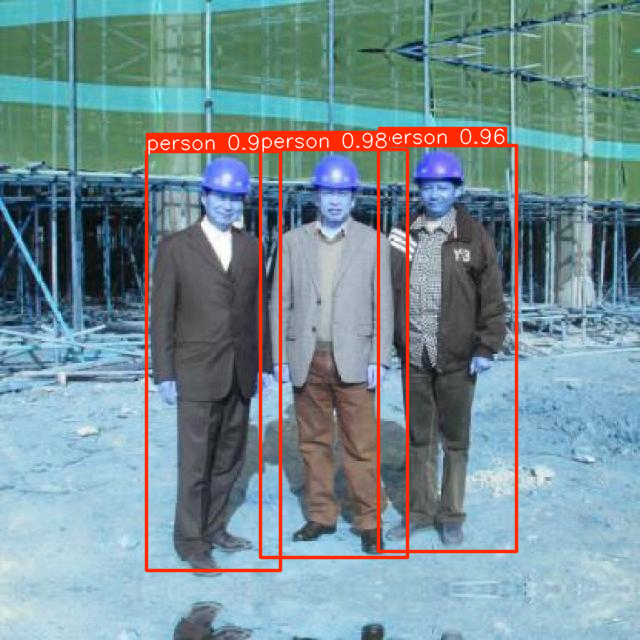

Result saved as result.jpg


In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # This is for displaying images in Colab

# Define your test image
test_image = '/content/drive/MyDrive/Syook Dataset/datasets/whole_image.jpg'

# Run inference
results = model(test_image)

# Plot the results
res_plotted = results[0].plot()

# Convert BGR to RGB (cv2 uses BGR by default)
res_plotted_rgb = cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB)

# Display the image
cv2_imshow(res_plotted_rgb)


cv2.imwrite('result.jpg', res_plotted)
print("Result saved as result.jpg")